##DSF-PT07 : Group 6 Project Phase 2: KingsCounty Realtors Ltd. 

###Group Members:
1. Dennis Walubengo
2. Julian Kilyungi
3. Sharon Chebet
4. Nduku Kiteng'e 
5. Omara Waldea 

##Problem Statement:
For this project, the team will use regression modeling to analyze house sales in a NorthWestern county.

###The Data:
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.

###Business Problem:
It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.


##Proposed Solution:

###Business Understanding:

The group have used the following imagined scenario to develop the business case for this project: 
Group 6 is KingsCounty Realtos Ltd. A real estate agent dealing with properties in Kings County. The target audience of our modelling is household owners and potential buyers who are either looking to sell or buy a property in King County and would like to contract KingsCounty Realtors to support them with the service. 

This model and presentation seeks to fulfill the following objectives:
1. Identify the impact of the independent variables on price. 
2. 
3. 

For the purpose of the project, the team used the data provided in kc_house_data.csv

The team followed the following process to be able to achieve the above objectives and develop clear recommendations for the customer:
1. Data Understanding
2. Data Preparation
3. Modelling
4. Evaluation
5. Develop recommendations

Each section is shared below with the related code elements. 
 



Step 1: Data Understanding
To start the section, the team first imported the initial relevant libraries to support reading and interpretation of the data. 

Next the team identified the contents of the datset provided in order to deliberate on what possible uses the data could have in supporting the clients mentioned:

Step 2: Data Preparation
a. Data Cleaning: 
For this process, the data was reviewed to identify the percentage of null values. 
A few problems were identified in the data:
1. The date was listed as an integer and not date time format. 
2. Some fields were listed as objects which would make it difficult to review and interpret data. 
3. There were a large number of null values for some of the columns; namely: xx, xx and xx 
4. Checking for and removing multicollinearity (correlated predictors)*****

b. Data Normalisation:
The team carried out the following for data normalisation: 
1. 

c. Preliminary Data Visualisation:
1. Created charts for the data to identify distribution, skewness of the data based on certain parameters.



##Step 3: Modelling
In this section the team developed the following models to test out which one would give the outcomes that could address the customers issues: 
Model 1: 
Model 2: 
Model 3: 


Step 4: Evaluation
In this step the team reviewed the models generated and selected the top 3 models. They then assessed the feedback from each to infer the following statements:
1. xxx
2. xxx

##Step 5: Developing Recommendations
The following recommendations were proposed from the data:
1. xx
2. xx

End of Markdown template

In [12]:
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle
import statsmodels
from statsmodels.formula.api import ols

In [17]:
#review what's in the dataset
data = pd.read_csv('C:/Users/User/OneDrive/Documents/Flatiron/Coursework/Phase2/phase2project/dsc-group-6-phase-2-project/data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [22]:
# Calculating the proportion for the null
proportion_of_null_values = (data.isna().sum()/len(data))*100
proportion_of_null_values

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

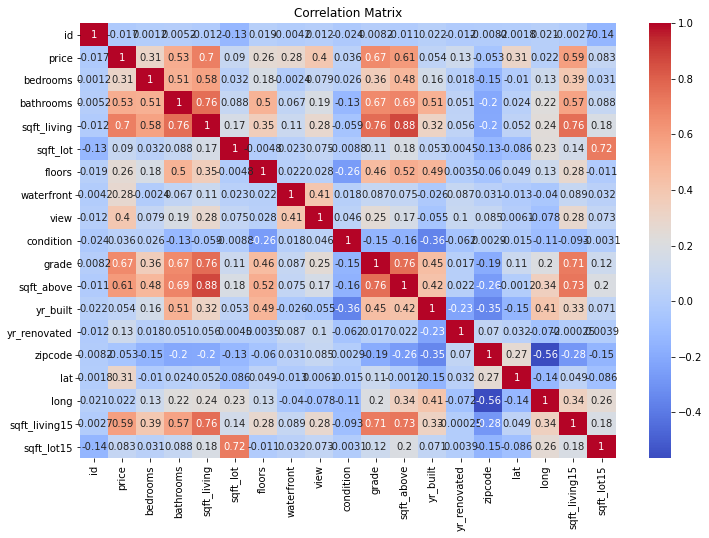

In [24]:
# Correlation matrix to determine columns to drop
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()